### 7_RandomForest_Classifier.ipynb

## 랜덤 포레스트 분류 (Random Forest Classifier)

- 여러 개의 결정 트리를 만들고, 각 트리의 예측값 중 '가장 많은 표'를 받은 클래스를 최종 예측 결과로 채택 (다수결 투표)
- 분류 문제에서 높은 성능을 보이고, 해석이 비교적 쉬움

In [21]:
import numpy as np

# 샘플 데이터
x = np.array([[10], [20], [30], [40], [50], [60], [70], [80], [90]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])

# 학습
from sklearn.ensemble import RandomForestClassifier

# tree : 10
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(x, y)

y_pred = model.predict(x)

# 평가
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred)

print(f'Random Forest Classifier :: accuracy : {accuracy}')

Random Forest Classifier :: accuracy : 1.0


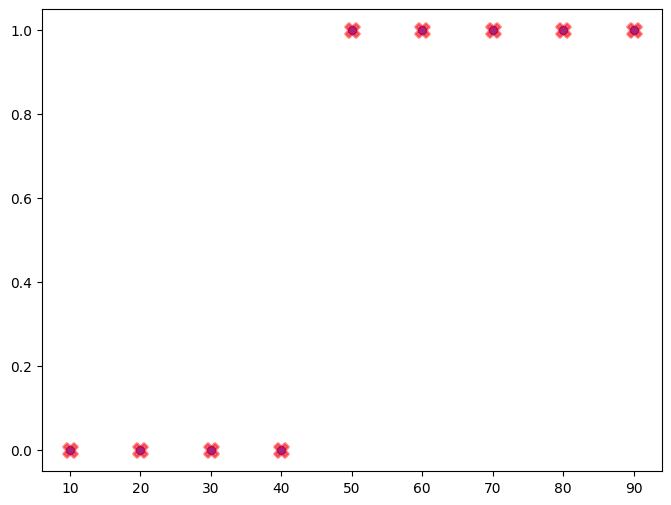

In [22]:
# 산점도 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(x, y, color='blue', alpha=0.7)
plt.scatter(x, y_pred, marker='X', color='red', alpha=0.5, lw=2, s=100)


---

In [23]:
# iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

# 독립변수, 종속변수를 다중할당
x, y = iris.data, iris.target

# 훈련용, 테스트용 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
# * 랜덤포레스트분류
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import classification_report
print('* --- random forest report --- *')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

* --- random forest report --- *
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



[Text(0.375, 0.9375, 'petal width (cm) <= 0.7\ngini = 0.665\nsamples = 74\nvalue = [44, 37, 39]\nclass = setosa'),
 Text(0.25, 0.8125, 'gini = 0.0\nsamples = 26\nvalue = [44, 0, 0]\nclass = setosa'),
 Text(0.3125, 0.875, 'True  '),
 Text(0.5, 0.8125, 'petal width (cm) <= 1.55\ngini = 0.5\nsamples = 48\nvalue = [0, 37, 39]\nclass = virginica'),
 Text(0.4375, 0.875, '  False'),
 Text(0.25, 0.6875, 'petal length (cm) <= 4.95\ngini = 0.188\nsamples = 23\nvalue = [0, 34, 4]\nclass = versicolor'),
 Text(0.125, 0.5625, 'gini = 0.0\nsamples = 21\nvalue = [0, 34, 0]\nclass = versicolor'),
 Text(0.375, 0.5625, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 4]\nclass = virginica'),
 Text(0.75, 0.6875, 'petal width (cm) <= 1.85\ngini = 0.145\nsamples = 25\nvalue = [0, 3, 35]\nclass = virginica'),
 Text(0.625, 0.5625, 'sepal width (cm) <= 3.15\ngini = 0.32\nsamples = 9\nvalue = [0, 3, 12]\nclass = virginica'),
 Text(0.5, 0.4375, 'petal width (cm) <= 1.75\ngini = 0.142\nsamples = 8\nvalue = [0, 1, 12]\ncl

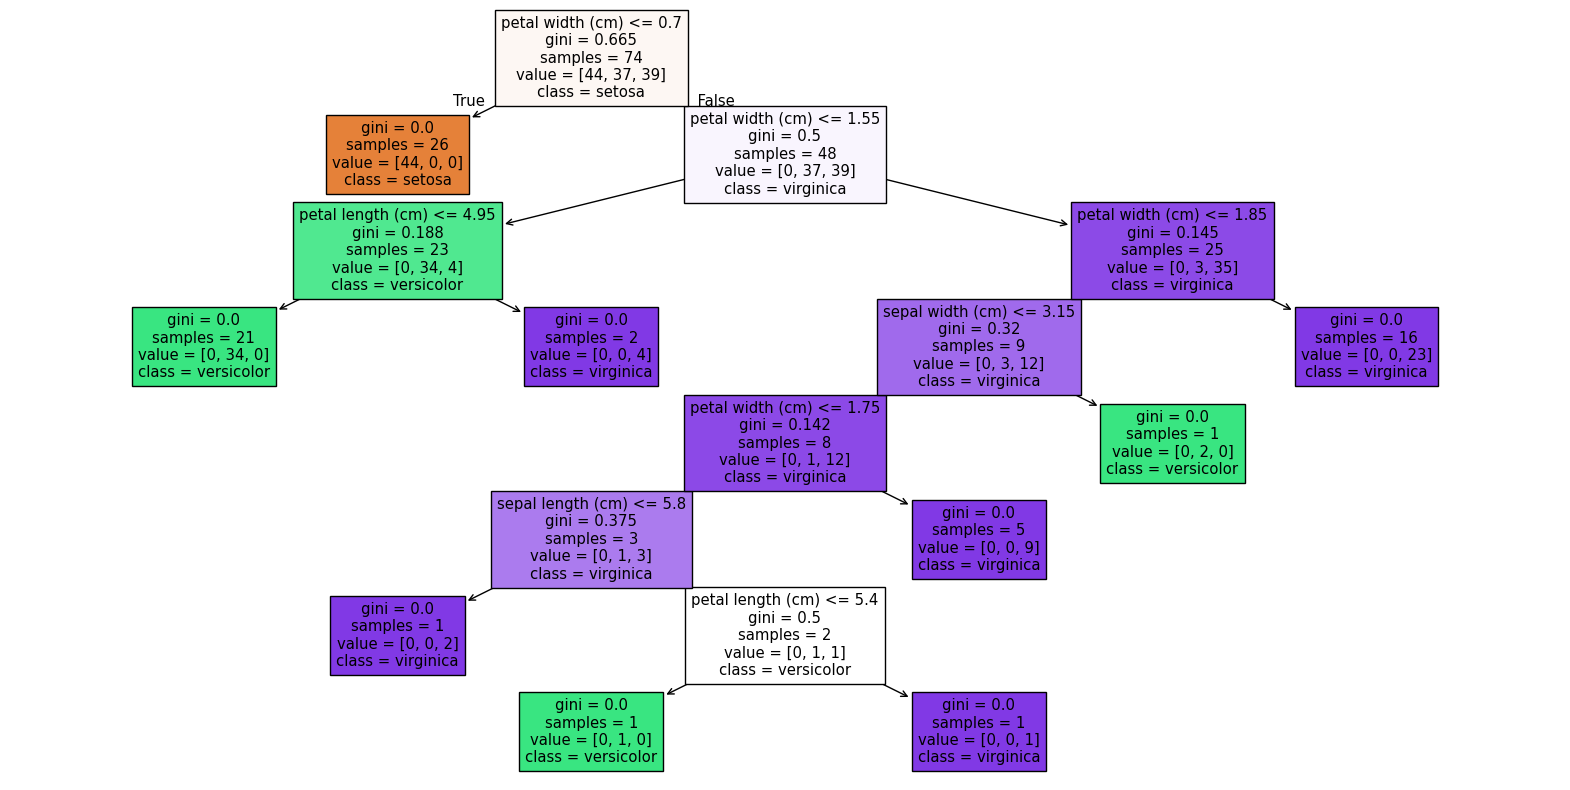

In [28]:
# 첫 번째 트리 시각화
tree = model.estimators_[0]

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))

plot_tree(
  tree,
  filled=True,
  feature_names=iris.feature_names,
  class_names=iris.target_names
)

* 특성 중요도 : [0.10809762 0.03038681 0.43999397 0.42152159]
* 인덱스 정보: [1 0 3 2]


([<matplotlib.axis.XTick at 0x196c7400810>,
 [Text(0, 0, 'petal length (cm)'),
  Text(1, 0, 'petal width (cm)'),
  Text(2, 0, 'sepal length (cm)'),
  Text(3, 0, 'sepal width (cm)')])

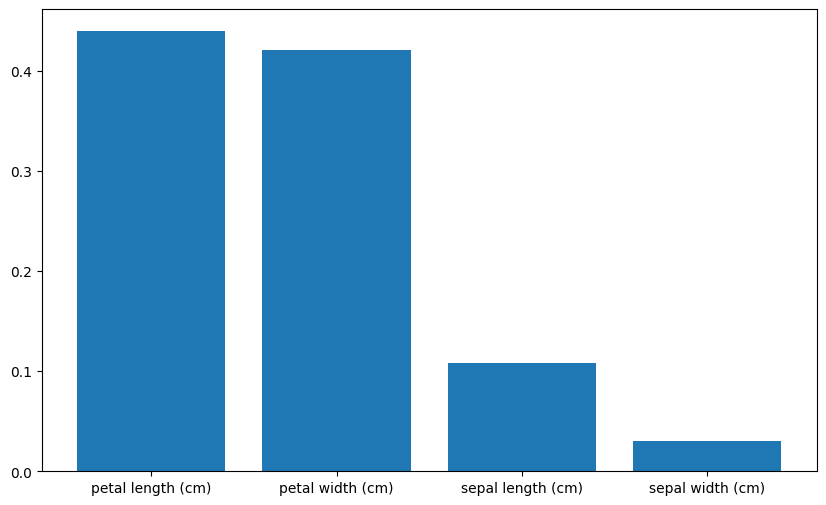

In [31]:
# 특성 중요도 : 모델이 학습하면서 얼마나 자주, 얼마나 중요한 역할로 특성을 사용했는지 계산하여 수치화.
#               숫자가 클수록 더 중요한 역할을 했다는 의미
importances = model.feature_importances_
print(f'* 특성 중요도 : {importances}')

# * numpy.argsort() : 배열을 정렬했을 때, 각 값이 원래 배열에서 어느 위치에 있었는 지 알려주는 함수. 기본: 오름차순
indices = np.argsort(importances)
print(f'* 인덱스 정보: {indices}')
# => [1 0 3 2]
# 내림차순
# => [2 3 0 1]
indices = indices[::-1]

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), 
        importances[indices])

plt.xticks(range(len(importances)),
           np.array(iris.feature_names)[indices])

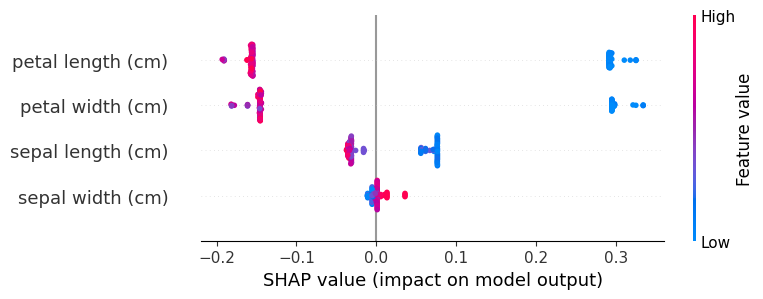

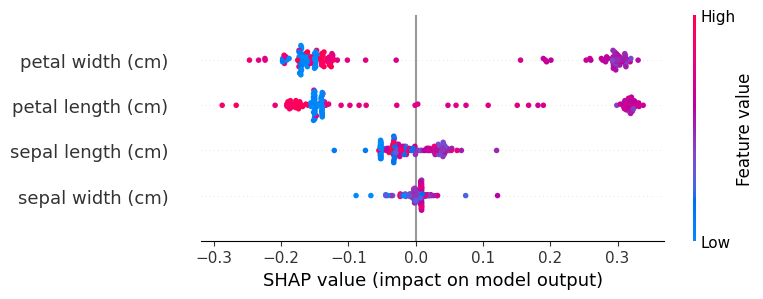

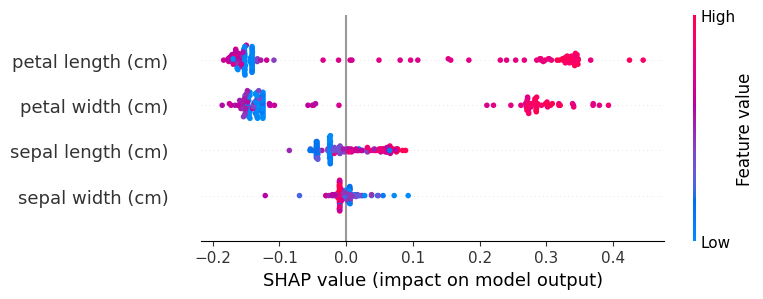

In [ ]:
# SHAP : SHapley Additive explanations
# - 게임 이론에서 나온 개념으로, 각 플레이어가 게임에서 얻는 기여도를 계산하는 방식에서 아이디어를 가져옴
#   - shapley value 이론 : 여러 명이 협력해서 보상을 얻는 게임에서, 모든 가능한 팀 조합을 만들어 각 플레이어가 팀에 들어갔을 때 기여도를 계산하고, 그 기여도를 평균하여 각자의 공정한 기여도를 정량화
# - 머신러닝(ML)에서는 각 feature가 모델 예측에 얼마나 기여했는지 수치로 계산하는 방법

# - feature 별 기여도 계산
#   - 양수 SHAP 값 : 예측을 증가시키는 방향
#   - 음수 SHAP 값 : 예측을 감소시키는 방향

# pip install shap
import shap
plt.figure(figsize=(20,10))

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x)
# print(shap_values)

for i in range(shap_values.shape[2]):
  print(f'* --- {iris.target_names[i]} 특성별 기여도 --- *')
  shap.summary_plot(shap_values[:,:,i], x, feature_names=iris.feature_names)